In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df_tel = pd.read_csv("https://raw.githubusercontent.com/murpi/wilddata/master/quests/churn_telecom.csv")

In [4]:
df_tel.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Yes
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Fiber optic,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,Fiber optic,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df_tel.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df_tel.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df_tel['OnlineSecurity'].value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

# LogisticRegression


yes = 1

no = 0 

In [8]:
def yes_no(x):
    if x == "Yes":
        return 1
    else:
        return 0
    
    

In [9]:
df_tel.columns.to_list()


['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [10]:
list_column = ['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup',
 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

In [11]:
df_tel_v1 = df_tel.copy()

In [12]:
for x in list_column:
    df_tel_v1[x] = df_tel[x].apply(yes_no)
    

In [13]:
df_tel_v1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [14]:
df_tel['Churn'].value_counts(normalize=True).mul(100).round(2)

Churn
No     68.49
Yes    31.51
Name: proportion, dtype: float64

In [15]:
list_payment = list(df_tel['PaymentMethod'].unique())
list_payment

['Electronic check',
 'Mailed check',
 'Bank transfer (automatic)',
 'Credit card (automatic)']

In [16]:
df_tel_v1 = pd.get_dummies(df_tel_v1, columns=['PaymentMethod','Contract','InternetService'])

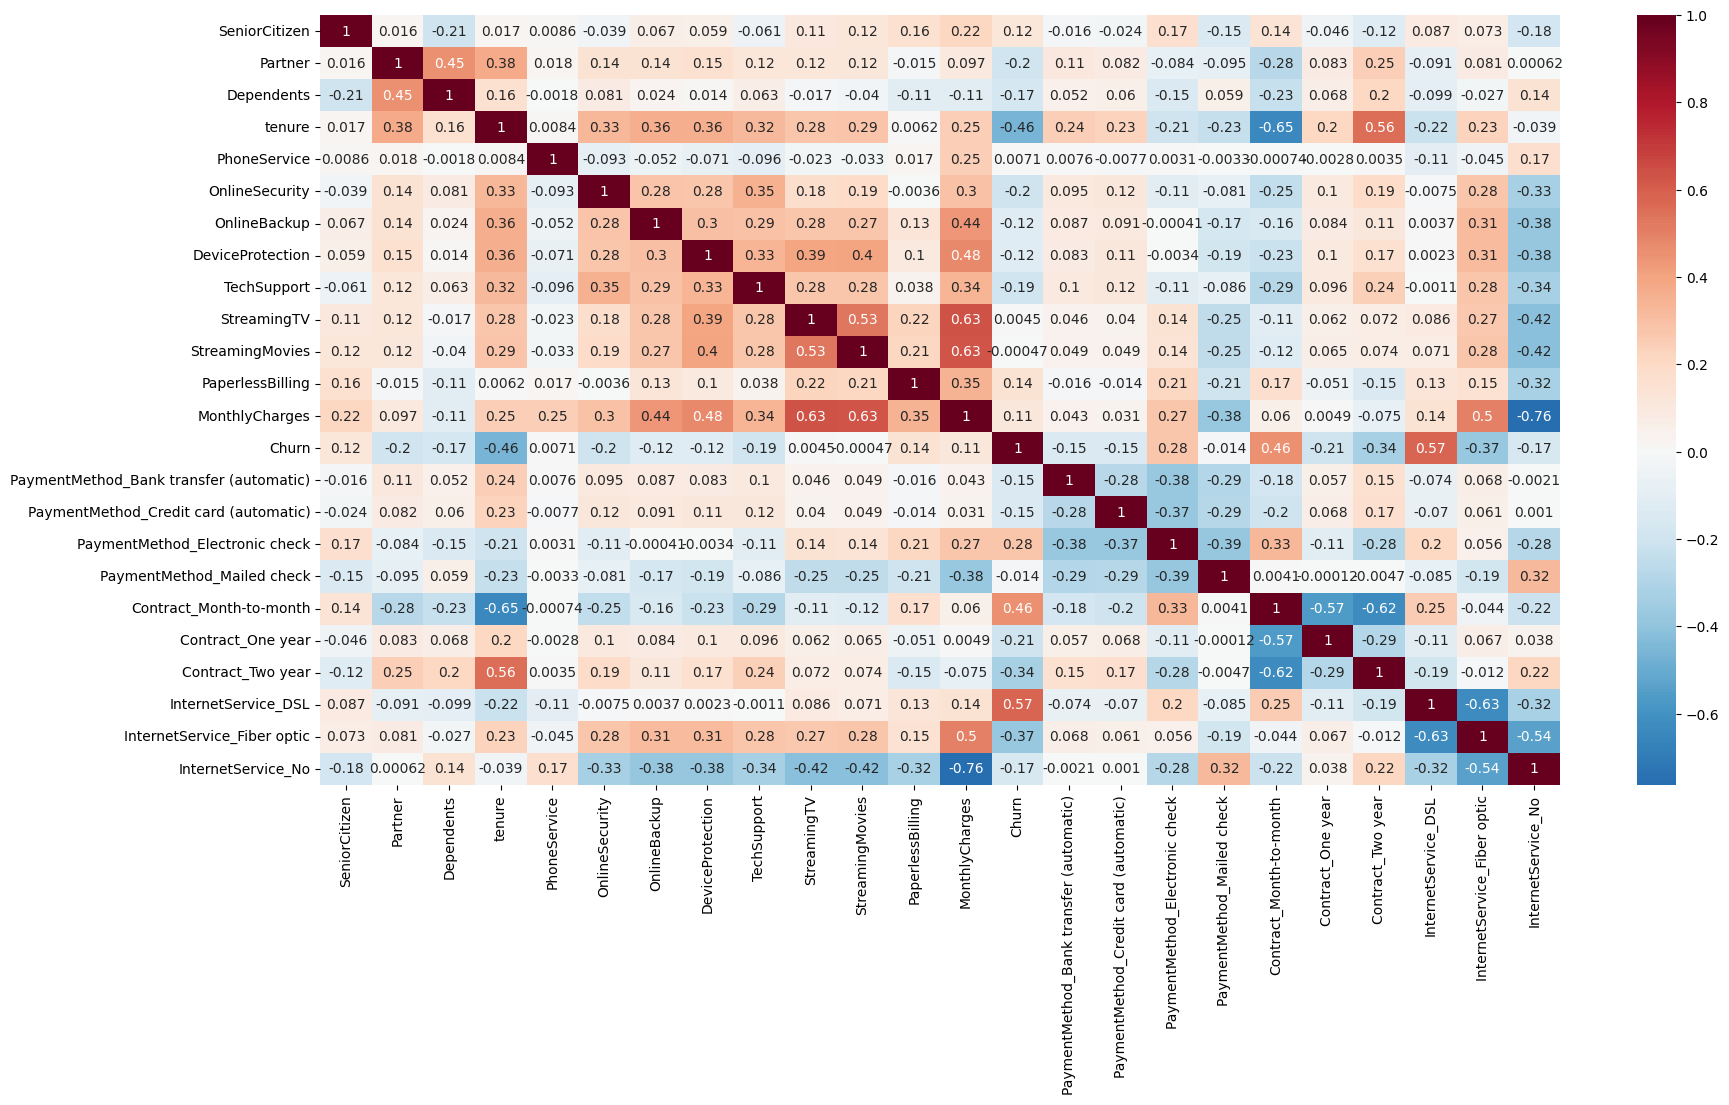

In [17]:
fig, ax = plt.subplots(figsize = (20,10))
sns.heatmap(df_tel_v1.corr(numeric_only=True), center=0, annot= True,cmap='RdBu_r')
plt.show()

TypeError: Image data of dtype object cannot be converted to float

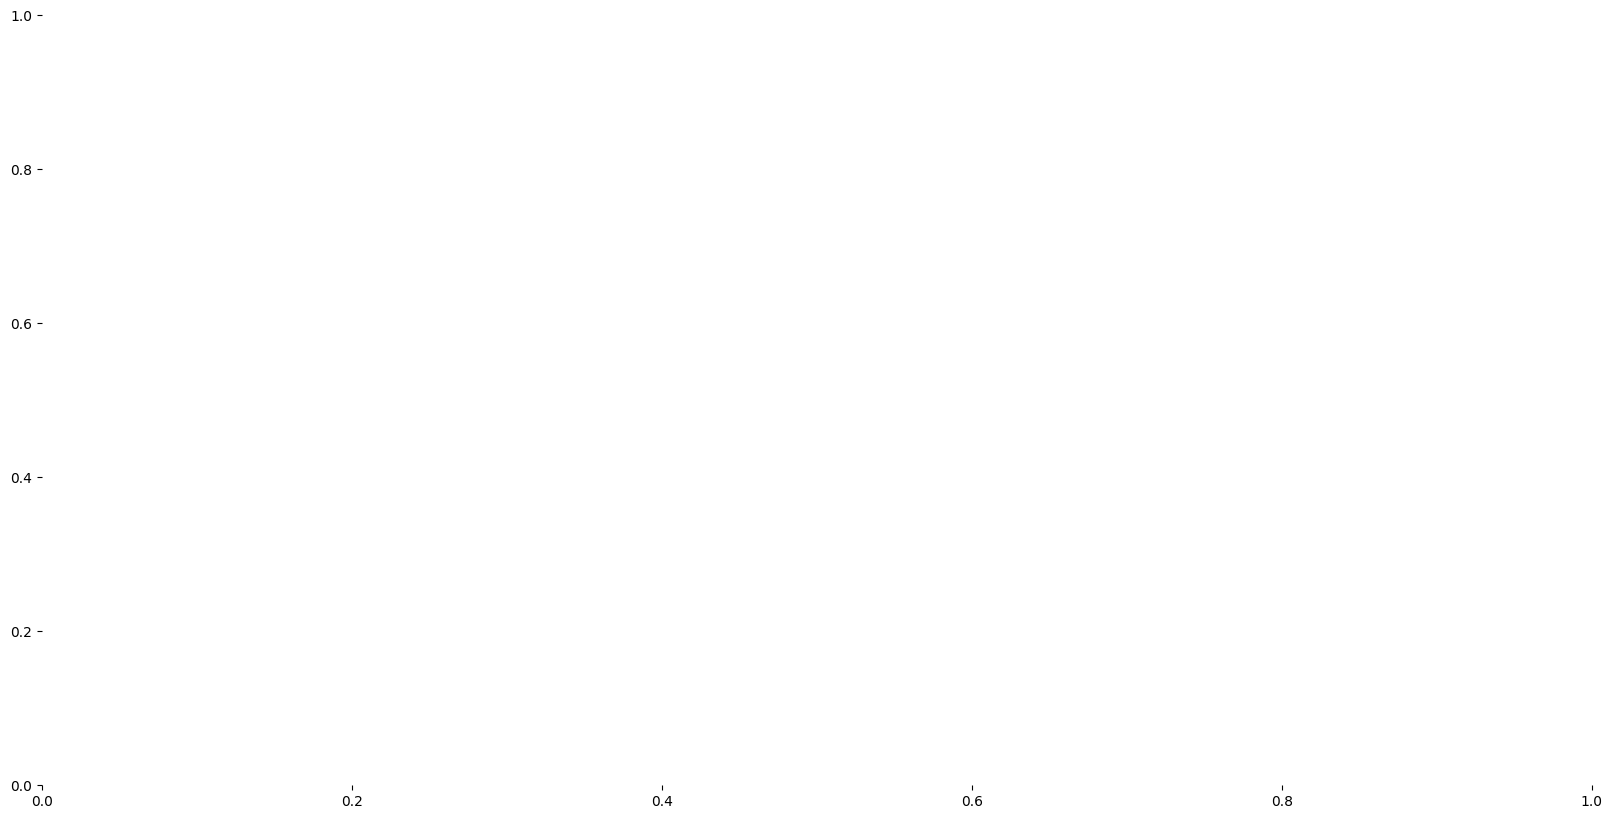

In [19]:
fig, ax = plt.subplots(figsize = (20,10))
sns.heatmap(df_tel_v1[['tenure','Contract_Month-to-month','Contract_One year','Contract_Two year','InternetService_DSL','InternetService_Fiber optic','InternetService_No','Churn']], center=0, annot= True,cmap='RdBu_r')
plt.show()

On peut voir 2 variables qui ont une forte corrélation avec le taux d'attrition (churn rate) :

- d'une part "Contract" puis que l'on passe d'une correlation positive avec "Month-to-month" à une corrélation négative avec "One year" et "Two year"

- d'autre part "InternetService" qui a une corrélation positive avec "DSL" et une corrélation négative avec "Fiber optic"

on peut en conclure que en fonction de son "Contract" et "InternetService" on a plus ou moins de chance de résilier !

In [20]:
df_tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df_tel_v1[['tenure', 'InternetService_Fiber optic', 'Contract_One year', 'Contract_Two year', 'InternetService_DSL','Contract_Month-to-month','InternetService_No']]
y = df_tel_v1['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 36, train_size = 0.75)

model = LogisticRegression().fit(X_train,y_train)

model.score(X_train, y_train), model.score(X_test, y_test)

(0.8413479742521772, 0.8216922203293583)

In [22]:
model.classes_

array([0, 1], dtype=int64)

Confusion Matrix on Test Set:
[[1113   63]
 [ 251  334]]


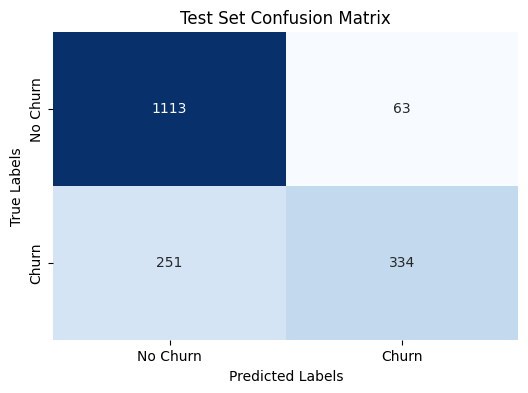

In [23]:
from sklearn.metrics import confusion_matrix

test_predictions = model.predict(X_test)

test_conf_matrix = confusion_matrix(y_test, test_predictions)

print("Confusion Matrix on Test Set:")
print(test_conf_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(test_conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Test Set Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

On cherche a predire ceux qui vont résilier, or le model est fiable pour predire  ce qui ne vont pas resilier !

In [24]:
for classweight in [2, 5, 10, 15]:
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 36, train_size = 0.75)
        model = LogisticRegression(class_weight = {1 : classweight})
        model.fit(X_train,y_train)
        print("Pour un 'Class weight = Yes' est de ",classweight,", les scores sont de :",model.score(X_train, y_train), model.score(X_test, y_test))

Pour un 'Class weight = Yes' est de  2 , les scores sont de : 0.8528966300643696 0.8341851220897217
Pour un 'Class weight = Yes' est de  5 , les scores sont de : 0.7595607724346838 0.7501419647927314
Pour un 'Class weight = Yes' est de  10 , les scores sont de : 0.6900795153351004 0.696763202725724
Pour un 'Class weight = Yes' est de  15 , les scores sont de : 0.6544869367663764 0.666098807495741


Confusion Matrix on Test Set:
[[791 385]
 [ 55 530]]


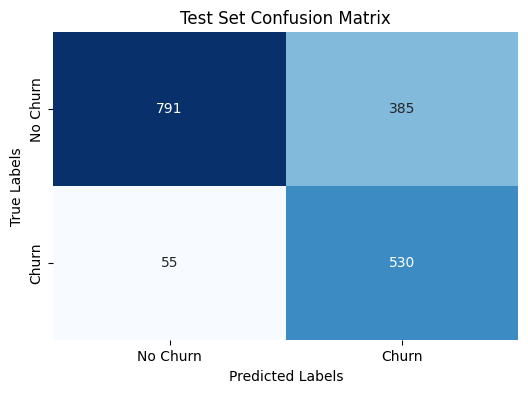

In [25]:
model = LogisticRegression(class_weight = {1 : 5})
model.fit(X_train,y_train)

test_predictions = model.predict(X_test)
test_conf_matrix = confusion_matrix(y_test, test_predictions)

print("Confusion Matrix on Test Set:")
print(test_conf_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(test_conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Test Set Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [26]:
X_test

,tenure,InternetService_Fiber optic,Contract_One year,Contract_Two year,InternetService_DSL,Contract_Month-to-month,InternetService_No
2661,66,True,False,True,False,False,False
2836,49,True,False,False,False,True,False
786,72,True,False,True,False,False,False
6556,6,False,True,False,False,False,True
4436,19,True,False,False,False,True,False
...,...,...,...,...,...,...,...
6924,1,False,False,False,True,True,False
6739,4,False,False,False,True,True,False
1829,8,True,False,False,False,True,False
2263,6,False,False,False,True,True,False


In [28]:
df_merge = pd.merge(X_test,df_tel,how='inner', left_index=True, right_index=True)
df_merge = df_merge[['customerID','gender','Churn','Contract','InternetService']]
df_merge

,customerID,gender,Churn,Contract,InternetService
2661,8780-YRMTT,Female,No,Two year,Fiber optic
2836,6988-CJEYV,Male,No,Month-to-month,Fiber optic
786,4992-LTJNE,Male,No,Two year,Fiber optic
6556,0661-KQHNK,Female,No,One year,No
4436,3639-XJHKQ,Female,No,Month-to-month,Fiber optic
...,...,...,...,...,...
6924,6457-GIRWB,Male,Yes,Month-to-month,DSL
6739,6994-KERXL,Male,No,Month-to-month,DSL
1829,3030-YDNRM,Male,No,Month-to-month,Fiber optic
2263,2506-CLAKW,Female,Yes,Month-to-month,DSL


In [29]:
df_merge.reset_index(drop=True, inplace=True)

In [30]:
df_churn = pd.DataFrame(model.predict_proba(X_test), columns=model.classes_)
df_churn.drop(columns= 0, inplace=True)
df_churn.rename(columns={1:'Probabilité de Résilation'}, inplace=True)
df_total = pd.merge(df_merge,df_churn,how='inner', left_index=True, right_index=True)
df_test = df_total.sort_values(by="Probabilité de Résilation", ascending=False)
df_test

,customerID,gender,Churn,Contract,InternetService,Probabilité de Résilation
823,4110-PFEUZ,Female,Yes,Month-to-month,DSL,0.989151
993,7180-PISOG,Male,Yes,Month-to-month,DSL,0.989151
816,1740-CSDJP,Male,Yes,Month-to-month,DSL,0.989151
593,7568-PODML,Male,Yes,Month-to-month,DSL,0.989151
238,4317-VTEOA,Male,Yes,Month-to-month,DSL,0.989151
...,...,...,...,...,...,...
1024,1814-WFGVS,Male,No,Two year,Fiber optic,0.020762
1041,6631-HMANX,Male,No,Two year,Fiber optic,0.020762
1051,0619-OLYUR,Male,No,Two year,Fiber optic,0.020762
1065,1775-KWJKQ,Male,No,Two year,Fiber optic,0.020762


In [31]:
for x in [0.6,0.70,0.75,0.80,0.85,0.9,0.95]:    
    print(f"Quand la colonne Probabilité de Résialtion est >= à {x} la répartitionde la colonne {df_test['Churn'][df_test['Probabilité de Résilation']>=x].value_counts(normalize=True).mul(100).round(2)}")

Quand la colonne Probabilité de Résialtion est >= à 0.6 la répartitionde la colonne Churn
Yes    62.02
No     37.98
Name: proportion, dtype: float64
Quand la colonne Probabilité de Résialtion est >= à 0.7 la répartitionde la colonne Churn
Yes    70.72
No     29.28
Name: proportion, dtype: float64
Quand la colonne Probabilité de Résialtion est >= à 0.75 la répartitionde la colonne Churn
Yes    76.96
No     23.04
Name: proportion, dtype: float64
Quand la colonne Probabilité de Résialtion est >= à 0.8 la répartitionde la colonne Churn
Yes    81.74
No     18.26
Name: proportion, dtype: float64
Quand la colonne Probabilité de Résialtion est >= à 0.85 la répartitionde la colonne Churn
Yes    84.3
No     15.7
Name: proportion, dtype: float64
Quand la colonne Probabilité de Résialtion est >= à 0.9 la répartitionde la colonne Churn
Yes    86.97
No     13.03
Name: proportion, dtype: float64
Quand la colonne Probabilité de Résialtion est >= à 0.95 la répartitionde la colonne Churn
Yes    88.5
No 

In [37]:
df_tel_v2 = df_tel[df_tel['Churn'] == 'No']
df_tel_v2 = df_tel_v2[['customerID','gender','tenure','Churn','Contract','InternetService']]

In [38]:
df_churn = pd.DataFrame(model.predict_proba(X), columns=model.classes_)
df_churn.drop(columns= 0, inplace=True)
df_churn.rename(columns={1:'Probabilité de Résilation'}, inplace=True)
df_total = pd.merge(df_tel_v2,df_churn,how='inner', left_index=True, right_index=True)

df_final = df_total.sort_values(by="Probabilité de Résilation", ascending=False)
df_final

,customerID,gender,tenure,Churn,Contract,InternetService,Probabilité de Résilation
211,4195-NZGTA,Female,1,No,Month-to-month,DSL,0.989151
1774,5207-PLSTK,Male,1,No,Month-to-month,DSL,0.989151
594,9244-ZVAPM,Male,1,No,Month-to-month,DSL,0.989151
3753,1816-FLZDK,Male,1,No,Month-to-month,DSL,0.989151
1800,6650-VJONK,Male,1,No,Month-to-month,DSL,0.989151
...,...,...,...,...,...,...,...
5930,8398-TBIYD,Female,72,No,Two year,Fiber optic,0.020762
2559,8263-QMNTJ,Male,72,No,Two year,Fiber optic,0.020762
4397,7663-YJHSN,Female,72,No,Two year,Fiber optic,0.020762
1390,8039-ACLPL,Female,72,No,Two year,Fiber optic,0.020762


In [39]:
df_final.to_csv('df_tel_final.csv', index=False)